In [ ]:
!pip install scikit-plot
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.tree import plot_tree

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #dfm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining 23 24/DS_senza_Miss_Val(dfm).csv')

In [ ]:
dfm.head() # data senza missing values, con 'features_duration' droppato, ma ancora da normalizzare

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,4.067086,happy


In [ ]:
dfm = dfm.drop(['name', 'duration_ms', 'explicit', 'popularity', 'artists', 'album_name', 'danceability', 'key',
                'loudness', 'mode', 'speechiness', 'liveness', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats', 'n_bars'], axis=1)

In [ ]:
dfm.head()

,energy,acousticness,instrumentalness,valence,processing,genre
0,0.513,0.302000,0.53600,0.6350,1.279305,j-dance
1,0.196,0.283000,0.93400,0.0336,2.367412,iranian
2,0.854,0.000089,0.80000,0.4890,3.700483,black-metal
3,0.585,0.066400,0.00127,0.3850,1.279305,bluegrass
4,0.687,0.000576,0.09690,0.6370,4.067086,happy


In [ ]:
y = np.array(dfm.pop('genre').values) # class labels
X = dfm.values # insieme di attributi da usare per predire la classe

In [ ]:
np.unique(y, return_counts=True)

(array(['afrobeat', 'black-metal', 'bluegrass', 'brazil', 'breakbeat',
        'chicago-house', 'disney', 'forro', 'happy', 'idm', 'indian',
        'industrial', 'iranian', 'j-dance', 'j-idol', 'mandopop', 'sleep',
        'spanish', 'study', 'techno'], dtype=object),
 array([750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750]))

# Partitioning

In [ ]:
random_state = 10

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4,stratify=y , random_state=random_state)

In [ ]:
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9000, 5) (6000, 5) (9000,) (6000,)


# Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# questa è griglia degli iperparametri da esplorare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
}

# cerco gli iperparametri migliori con RandomizedSearchCV
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)


In [ ]:
# Esegue la ricerca casuale sugli iperparametri
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Iperparametri migliori:", best_params)

Iperparametri migliori: {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'gini'}


In [ ]:
# uso gli iperparametri migliori per addestrare il classificatore DT
dt_classifier_best = DecisionTreeClassifier(random_state=42, **best_params)
dt_classifier_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=6,
                       random_state=42)

In [ ]:
%%time
plt.figure(figsize=(40, 10), dpi=1000)
plot_tree(dt_classifier_best, feature_names=dfm.columns, filled=True, rounded=True, fontsize=8)
plt.show()

In [ ]:
# Effettua previsioni sul set di test
y_pred = dt_classifier_best.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.30866666666666664


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

     afrobeat       0.21      0.19      0.20       300
  black-metal       0.54      0.50      0.52       300
    bluegrass       0.31      0.39      0.34       300
       brazil       0.11      0.05      0.07       300
    breakbeat       0.15      0.10      0.12       300
chicago-house       0.25      0.37      0.30       300
       disney       0.32      0.31      0.31       300
        forro       0.37      0.46      0.41       300
        happy       0.28      0.26      0.27       300
          idm       0.24      0.11      0.15       300
       indian       0.21      0.17      0.19       300
   industrial       0.23      0.30      0.26       300
      iranian       0.35      0.29      0.32       300
      j-dance       0.24      0.24      0.24       300
       j-idol       0.30      0.38      0.33       300
     mandopop       0.27      0.57      0.37       300
        sleep       0.79      0.58      

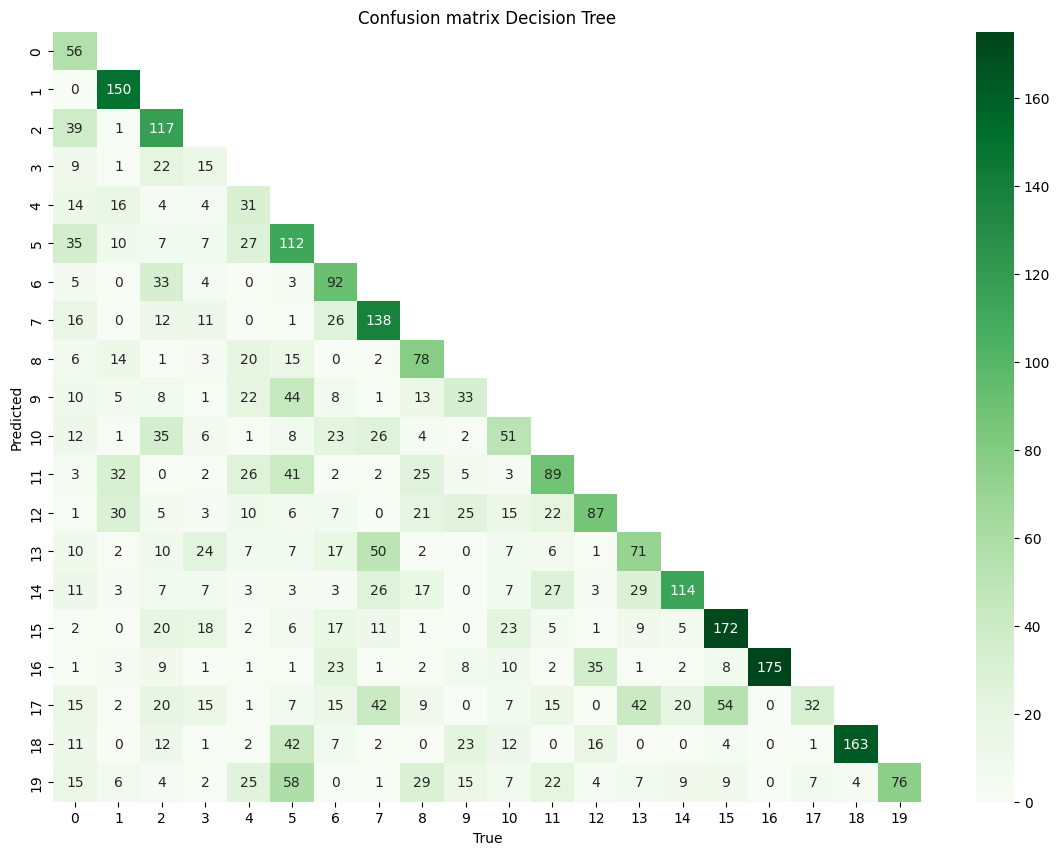

In [ ]:
cf = confusion_matrix(y_test, y_pred) # y_test sono i casi reali, y_test_pred sono i casi previsti dal classificatore

mask = np.triu(np.ones_like(cf), k=1) # Imposta la maschera per nascondere la parte superiore della matrice

plt.figure(figsize=(14, 10))
sns.heatmap(cf, annot=True, fmt='d', cmap="Greens", annot_kws={"size": 10}, mask=mask)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title('Confusion matrix Decision Tree')
plt.show()

In [ ]:
y_test_pred_proba = dt_classifier_best.predict_proba(X_test)

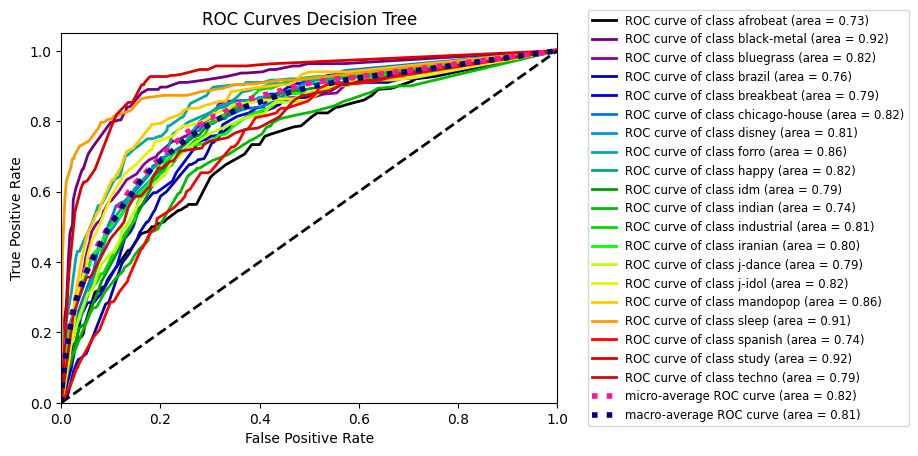

0.8146013888888888


In [ ]:
plot_roc(y_test, dt_classifier_best.predict_proba(X_test)) # plotta la roc curve
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.title('ROC Curves Decision Tree')
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

The labels study (0.92), black-metal (0.92) e sleep (0.91) have the best results. The model predicts very well the istances of these three labels.

Considering the ROC-AUC score, we can state that this is a good model for classification, because the score (0.81) is behond 0.75.

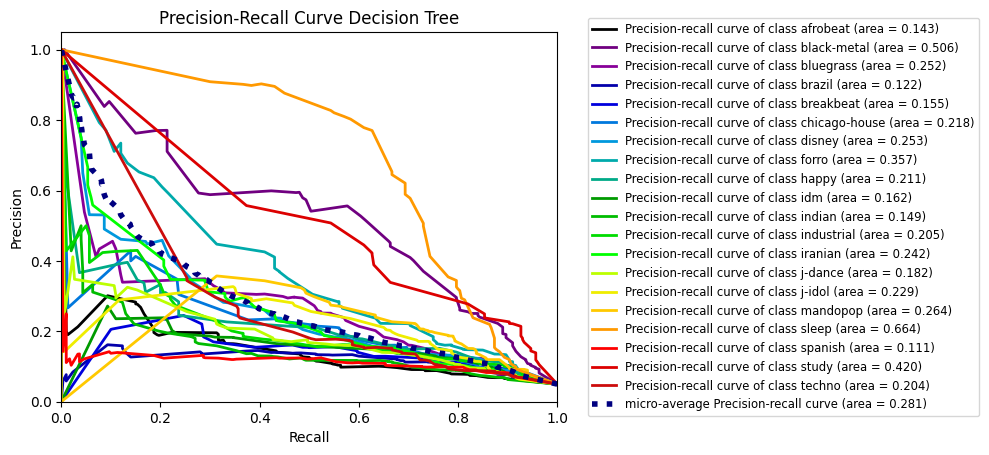

In [ ]:
plot_precision_recall(y_test, dt_classifier_best.predict_proba(X_test)) # qui plot di recall e precision
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.title('Precision-Recall Curve Decision Tree')
plt.show()

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Classificatore KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

In [ ]:
clf = KNeighborsClassifier()

# Definizione della griglia dei parametri da esplorare
param_grid = {
    'n_neighbors': randint(1, 50),  # Range per il numero di vicini
    'weights': ['uniform', 'distance'],  # Pesi dei vicini
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Metriche di distanza
}

# Inizializzazione e addestramento di RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_norm, y_train)

print("Migliori parametri trovati:")
print(random_search.best_params_)
print("\nMiglior punteggio di accuratezza:")
print(random_search.best_score_)

# addestro il modello finale con i parametri trovati prima
best_clf = random_search.best_estimator_
best_clf.fit(X_train_norm, y_train)

Migliori parametri trovati:
{'metric': 'manhattan', 'n_neighbors': 38, 'weights': 'distance'}

Miglior punteggio di accuratezza:
0.3052222222222222


KNeighborsClassifier(metric='manhattan', n_neighbors=38, weights='distance')

In [ ]:
# predict: Predict the class labels for the provided data.
y_test_pred = best_clf.predict(X_test_norm)
y_test_pred

array(['black-metal', 'industrial', 'spanish', ..., 'j-dance', 'spanish',
       'brazil'], dtype=object)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.29433333333333334


In [ ]:
# performance evaluation
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.22      0.11      0.15       300
  black-metal       0.32      0.56      0.41       300
    bluegrass       0.30      0.34      0.32       300
       brazil       0.16      0.12      0.13       300
    breakbeat       0.24      0.18      0.21       300
chicago-house       0.28      0.27      0.27       300
       disney       0.44      0.35      0.39       300
        forro       0.33      0.49      0.40       300
        happy       0.27      0.21      0.24       300
          idm       0.21      0.08      0.11       300
       indian       0.21      0.16      0.18       300
   industrial       0.18      0.22      0.20       300
      iranian       0.39      0.19      0.25       300
      j-dance       0.17      0.22      0.19       300
       j-idol       0.25      0.32      0.28       300
     mandopop       0.25      0.47      0.33       300
        sleep       0.63      0.62      0.63       300
      spa

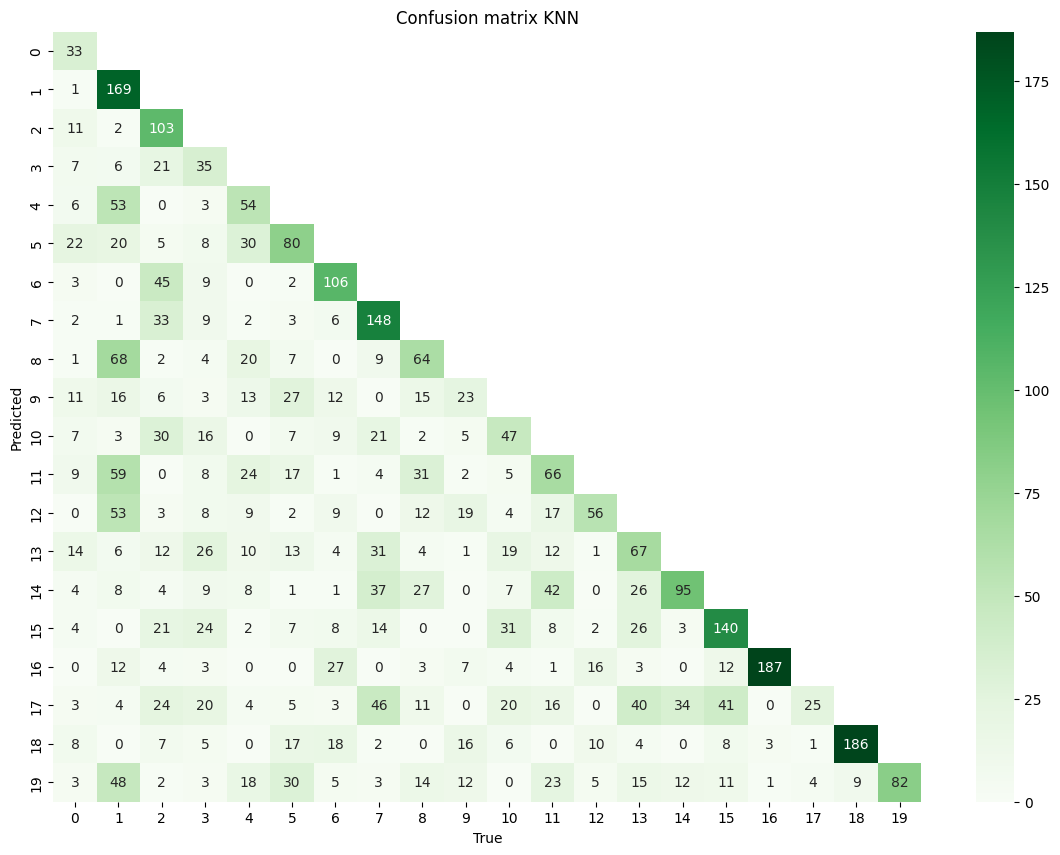

In [ ]:
cf = confusion_matrix(y_test, y_test_pred)

mask = np.triu(np.ones_like(cf), k=1) # Imposta la maschera per nascondere la parte superiore della matrice

plt.figure(figsize=(14, 10))
sns.heatmap(cf, annot=True, fmt='d', cmap="Greens", annot_kws={"size": 10}, mask=mask)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title('Confusion matrix KNN')
plt.show()

In [ ]:
# Return probability estimates for the test data X.
y_test_pred_proba = best_clf.predict_proba(X_test_norm)
y_test_pred_proba[0:10]

array([[0.        , 0.42816019, 0.        , 0.        , 0.01733827,
        0.        , 0.        , 0.        , 0.17651169, 0.        ,
        0.03532672, 0.11253411, 0.11678329, 0.        , 0.09592198,
        0.        , 0.01742373, 0.        , 0.        , 0.        ],
       [0.        , 0.19192213, 0.        , 0.        , 0.        ,
        0.03441525, 0.        , 0.        , 0.06431854, 0.06291874,
        0.01218816, 0.51820583, 0.06642589, 0.        , 0.04960546,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.10630937, 0.02005417, 0.02002215, 0.1133235 , 0.02520276,
        0.04497452, 0.02102342, 0.        , 0.05322741, 0.        ,
        0.06691183, 0.02091535, 0.        , 0.07607965, 0.09691989,
        0.        , 0.        , 0.31526959, 0.        , 0.01976641],
       [0.02646196, 0.        , 0.04378489, 0.10867947, 0.        ,
        0.        , 0.03693573, 0.13043075, 0.        , 0.01254027,
        0.14573554, 0.        , 0.24607336, 0

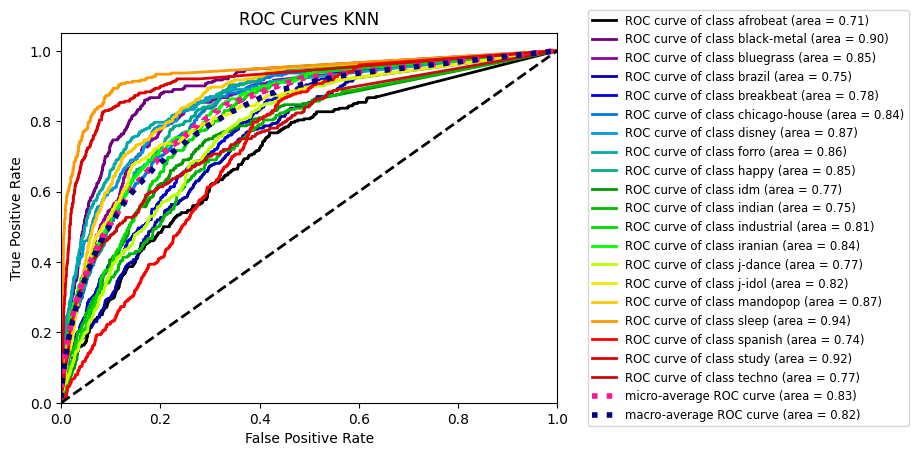

In [ ]:
plot_roc(y_test, y_test_pred_proba)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.title('ROC Curves KNN')
plt.show()

The labels sleep (0.94), study (0.92) and black-metal (0.90) have the best results. The model predicts very well the istances of these three labels.

In [ ]:
roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro") # misura unica delle prestazioni del modello rispetto a tutte le classi

0.8195831140350878

Considering the ROC-AUC score, we can state that this is a good model for classification, because the score (0.81) is behond 0.75.

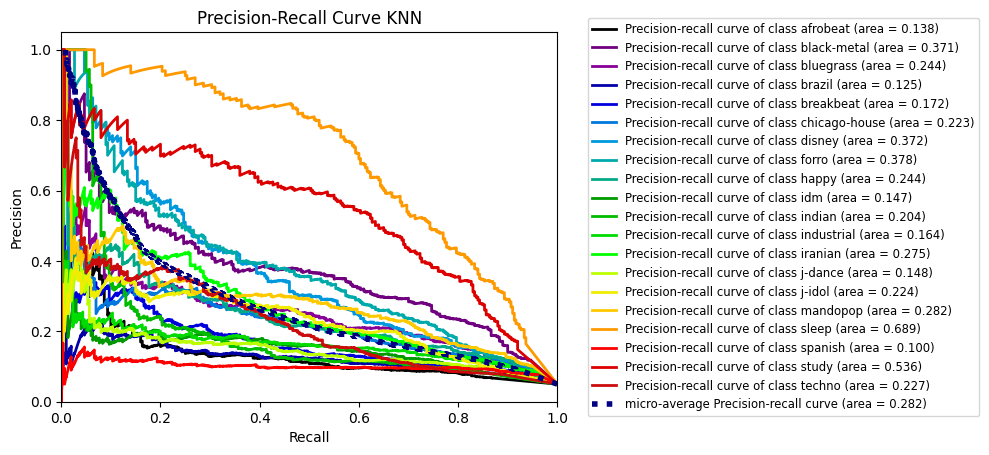

In [ ]:
plot_precision_recall(y_test, y_test_pred_proba) # mostra come variano precisione e recall quando si cambia la soglia di attenzione del modello
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.title('Precision-Recall Curve KNN')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [ ]:
clf = GaussianNB()

In [ ]:
# Definisci la griglia degli iperparametri da esplorare
param_dist = {
    # Iperparametri specifici del classificatore Naive Bayes, ad esempio la varianza minima in GaussianNB
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}

In [ ]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
# Esegui la ricerca casuale sugli iperparametri
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                          1e-06, 1e-05]},
                   random_state=42)

In [ ]:
# Visualizza gli iperparametri migliori
best_params = random_search.best_params_
print("Iperparametri migliori:", best_params)

Iperparametri migliori: {'var_smoothing': 1e-09}


In [ ]:
# Addestra il modello con gli iperparametri migliori
naive_bayes_best = GaussianNB(var_smoothing=best_params['var_smoothing'])
naive_bayes_best.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Effettua previsioni sul set di test
y_pred = naive_bayes_best.predict(X_test)

In [ ]:
# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.25833333333333336


In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     afrobeat       0.30      0.07      0.11       300
  black-metal       0.26      0.53      0.35       300
    bluegrass       0.25      0.14      0.18       300
       brazil       0.15      0.07      0.10       300
    breakbeat       0.22      0.10      0.14       300
chicago-house       0.30      0.30      0.30       300
       disney       0.38      0.19      0.25       300
        forro       0.32      0.55      0.41       300
        happy       0.16      0.31      0.21       300
          idm       0.21      0.01      0.02       300
       indian       0.00      0.00      0.00       300
   industrial       0.17      0.06      0.09       300
      iranian       0.15      0.04      0.06       300
      j-dance       0.17      0.28      0.21       300
       j-idol       0.20      0.48      0.28       300
     mandopop       0.25      0.65      0.36       300
        sleep       0.39      0.66      0.49       300
      spa

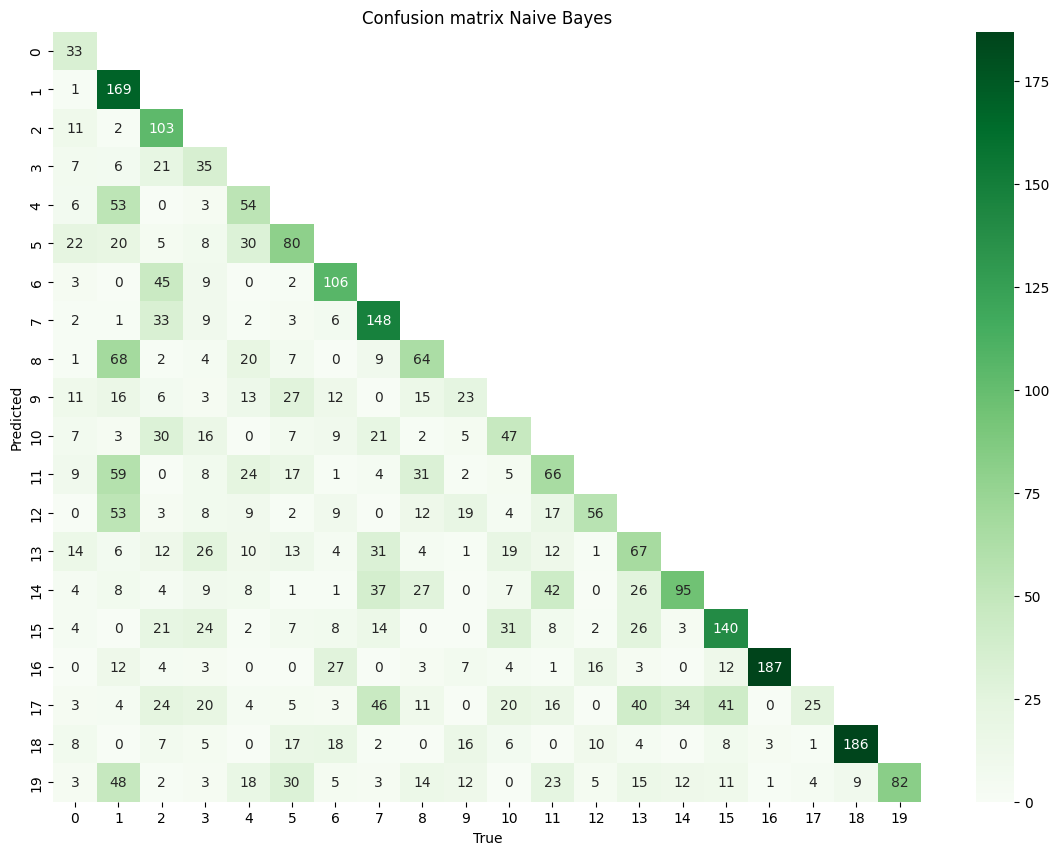

In [ ]:
cf = confusion_matrix(y_test, y_test_pred)

mask = np.triu(np.ones_like(cf), k=1) # Imposta la maschera per nascondere la parte superiore della matrice

plt.figure(figsize=(14, 10))
sns.heatmap(cf, annot=True, fmt='d', cmap="Greens", annot_kws={"size": 10}, mask=mask)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title('Confusion matrix Naive Bayes')
plt.show()

In [ ]:
naive_bayes_best.predict_proba(X_test)

array([[2.56563468e-03, 2.62720123e-01, 1.69746429e-04, ...,
        1.91657574e-02, 1.77268312e-06, 2.43959718e-02],
       [3.08885208e-03, 2.31123075e-01, 2.13172928e-04, ...,
        2.31112194e-02, 2.19885371e-06, 2.38463717e-02],
       [3.20643392e-02, 9.04568420e-05, 8.62049564e-03, ...,
        1.77672863e-01, 9.82291324e-06, 6.65138415e-03],
       ...,
       [3.50115644e-02, 4.79324755e-05, 6.50160234e-03, ...,
        1.66995061e-01, 1.25925271e-05, 6.73018228e-03],
       [1.63306382e-02, 4.09005828e-02, 4.63917350e-03, ...,
        1.31647177e-01, 9.69801324e-05, 3.18321763e-02],
       [4.84054941e-02, 8.30410956e-06, 7.33238881e-02, ...,
        1.83818041e-01, 1.55713540e-03, 5.11301611e-03]])

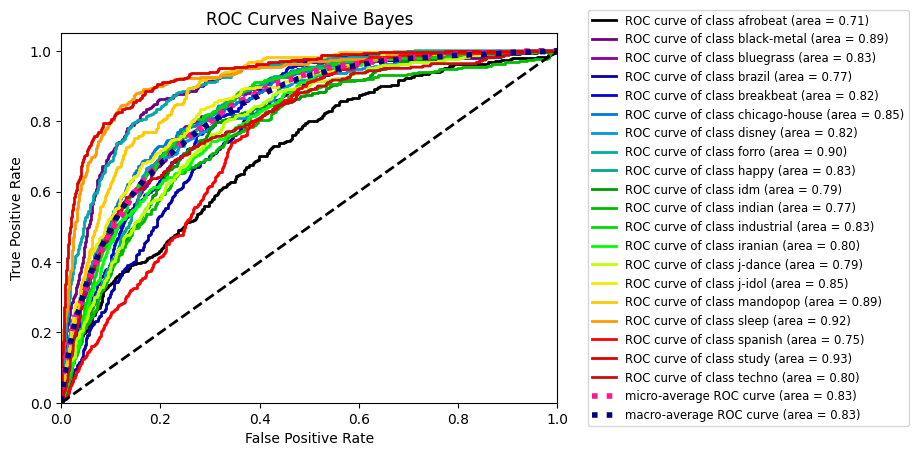

0.8272507894736842


In [ ]:
plot_roc(y_test, naive_bayes_best.predict_proba(X_test))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.title('ROC Curves Naive Bayes')
plt.show()
print(roc_auc_score(y_test, naive_bayes_best.predict_proba(X_test), multi_class="ovr", average="macro"))

The labels study (0.93), sleep (0.92) and forro (0.90) have the best results. The model predicts very well the istances of these three labels.

Considering the ROC-AUC score, we can state that this is a good model for classification, because the score (0.82) is behond 0.75.

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
# Definisci la griglia degli iperparametri da esplorare
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
# ricerca casuale degli iperparametri
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42)

In [ ]:
best_params = random_search.best_params_
print("Iperparametri migliori:", best_params)

Iperparametri migliori: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}


In [ ]:
# Addestra il modello con gli iperparametri migliori
random_forest_best = RandomForestClassifier(random_state=42, **best_params)
random_forest_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150, random_state=42)

In [ ]:
# Effettua previsioni sul set di test
y_pred = random_forest_best.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.35333333333333333


In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     afrobeat       0.34      0.17      0.23       300
  black-metal       0.55      0.62      0.58       300
    bluegrass       0.34      0.42      0.38       300
       brazil       0.17      0.09      0.12       300
    breakbeat       0.24      0.17      0.20       300
chicago-house       0.28      0.36      0.32       300
       disney       0.39      0.37      0.38       300
        forro       0.39      0.54      0.45       300
        happy       0.33      0.34      0.34       300
          idm       0.32      0.14      0.20       300
       indian       0.28      0.16      0.20       300
   industrial       0.26      0.26      0.26       300
      iranian       0.43      0.35      0.38       300
      j-dance       0.24      0.35      0.29       300
       j-idol       0.32      0.41      0.36       300
     mandopop       0.29      0.55      0.38       300
        sleep       0.79      0.68      0.73       300
      spa

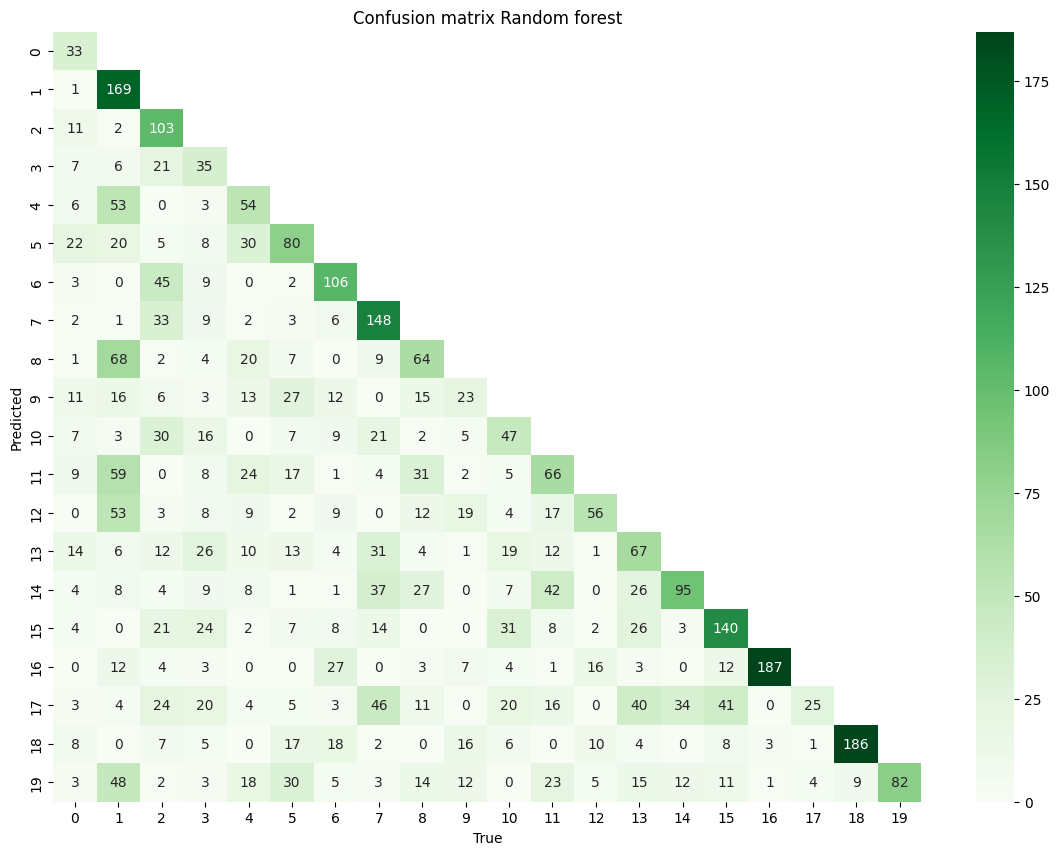

In [ ]:
cf = confusion_matrix(y_test, y_test_pred)

mask = np.triu(np.ones_like(cf), k=1) # Imposta la maschera per nascondere la parte superiore della matrice

plt.figure(figsize=(14, 10))
sns.heatmap(cf, annot=True, fmt='d', cmap="Greens", annot_kws={"size": 10}, mask=mask)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title('Confusion matrix Random forest')
plt.show()

In [ ]:
random_forest_best.predict_proba(X_test)

array([[3.96408221e-03, 4.68624014e-01, 0.00000000e+00, ...,
        7.28351716e-03, 0.00000000e+00, 7.32826848e-03],
       [2.01850011e-03, 8.39976549e-02, 6.45514175e-04, ...,
        1.69260342e-02, 1.55038760e-04, 5.30548400e-02],
       [1.35681259e-01, 6.82435252e-03, 8.31191666e-02, ...,
        1.92302975e-01, 1.08139333e-02, 3.02117655e-02],
       ...,
       [4.73798722e-02, 2.83358524e-02, 6.88863959e-03, ...,
        1.81709306e-01, 5.69324183e-03, 5.61289912e-02],
       [4.91136715e-02, 5.43231454e-03, 2.30556533e-02, ...,
        1.37049197e-01, 1.92324637e-03, 2.25680798e-02],
       [5.99322382e-02, 2.97947674e-04, 8.62884702e-02, ...,
        1.03450296e-01, 3.85394347e-02, 3.76941679e-03]])

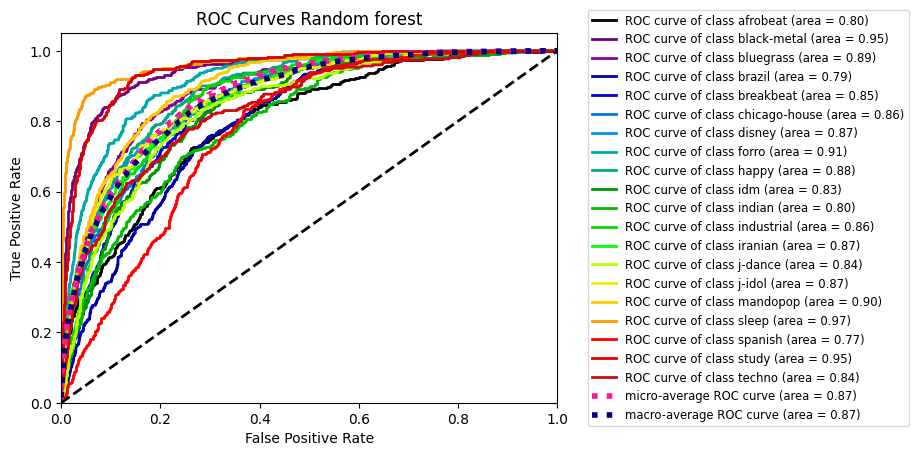

0.8653448538011694


In [ ]:
plot_roc(y_test, random_forest_best.predict_proba(X_test))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.title('ROC Curves Random forest')
plt.show()
print(roc_auc_score(y_test, random_forest_best.predict_proba(X_test), multi_class="ovr", average="macro"))

The labels sleep (0.97), study (0.95) and black-metal (0.95) have the best results. The model predicts very well the istances of these three labels.

Considering the ROC-AUC score, we can state that this is a good model for classification, because the score (0.86) is behond 0.75.

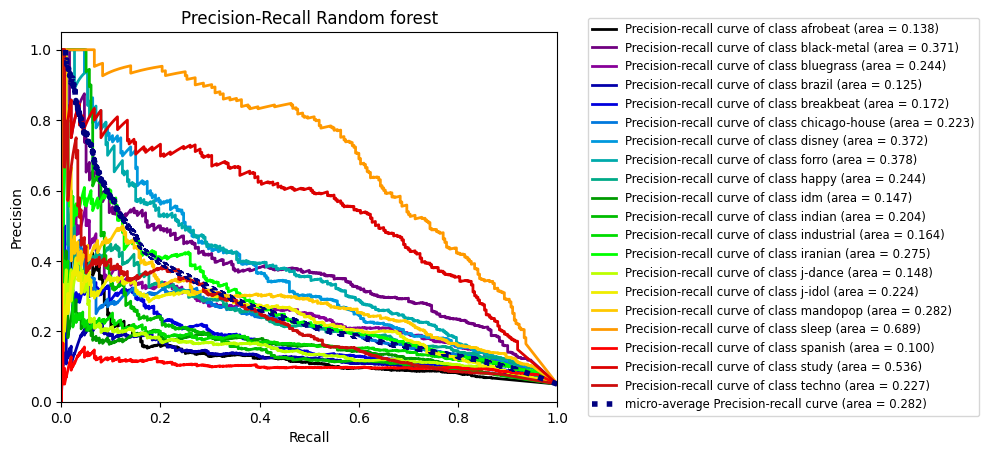

In [ ]:
plot_precision_recall(y_test, y_test_pred_proba) # mostra come variano precisione e recall quando si cambia la soglia di attenzione del modello
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.title('Precision-Recall Random forest')
plt.show()